Segmentation
=======

In [2]:
%matplotlib inline

import cv2
import numpy as np
from matplotlib import pyplot as plt

from skimage import data, segmentation, color
from skimage.future import graph

Original image
----------------

(-0.5, 3871.5, 2591.5, -0.5)

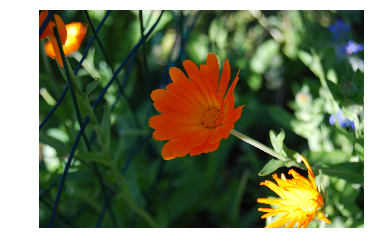

In [3]:
img = plt.imread('./data/DSC_0066.JPG')
plt.imshow(img)
plt.axis('off')

Segmentation based on Mean shift
-----------------------------------

The kernel for segmentation
$$K_{h_s, h_r}(\mathbf{x}) = \frac{C}{{h^2_s} {h^p_r}}k(\|\frac{\mathbf{x}^s}{h_s}\|^2)k(\|\frac{\mathbf{x}^r}{h_r}\|^2)$$

In [99]:
def convert_img_vec(img_rgb):
    vecs = []
    img_Luv = cv2.cvtColor(img, cv2.COLOR_RGB2Luv)
    
    for x in range(img_Luv.shape[0]):
        for y in range(img_Luv.shape[1]):
            vecs.append(np.append([x, y], img_Luv[x, y, :]))
            
    return vecs


def euclid_distance(x, xi):
    return np.sqrt(np.sum((x - xi)**2))


def neighbourhood_points(X, x_centroid, distance = 5):
    eligible_X = []
    for x in X:
        distance_between = euclid_distance(x, x_centroid)
        if distance_between <= distance:
            eligible_X.append(x)
            
    return eligible_X


def gaussian_kernel(hs, hr, C, X):
    val = (C/(hs**2 * hr**3)) * np.exp(-(X[0]**2 + X[1]**2)/(hs**2)) * np.exp(-(X[2]**2 + X[3]**2 + X[4]**2)/(hr**2))()
    
    return val



[array([  0,   0, 179,  86,  85]),
 array([  0,   1, 187,  85,  85]),
 array([  0,   2, 190,  85,  87]),
 array([  0,   3, 183,  86,  87]),
 array([  0,   4, 175,  86,  87]),
 array([  0,   5, 179,  86,  88]),
 array([  0,   6, 197,  87,  88]),
 array([  0,   7, 190,  87,  88]),
 array([  0,   8, 173,  88,  87]),
 array([  0,   9, 176,  89,  86])]

Segmentation based on Normalized Cut
----------------------------------------

In [5]:
labels1 = segmentation.slic(img, compactness=30, n_segments=4)
g = graph.rag_mean_color(img, labels1, mode='similarity')
labels2 = graph.cut_normalized(labels1, g)
out = color.label2rgb(labels2, img, kind='avg')

plt.imshow(out)

KeyError: 0